In [1]:
# Dependencies and Setup
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
trial_data_combined = pd.merge(trial_data, mouse_data, how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
trial_data_combined.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_means= trial_data_combined.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean() 

# Convert to DataFrame
tumor_volume_means_df= pd.DataFrame(tumor_volume_means)

# Reset index
tumor_volume_means_df = tumor_volume_means_df.reset_index()

# Preview DataFrame
tumor_volume_means_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_ses = trial_data_combined.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_volume_ses_df = pd.DataFrame(tumor_volume_ses)
tumor_volume_ses_df = tumor_volume_ses_df.reset_index()

# # Preview DataFrame
tumor_volume_ses_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_means_df = tumor_volume_means_df.pivot(index="Timepoint", columns="Drug",values="Tumor Volume (mm3)")

# Preview that Reformatting worked
tumor_volume_means_df.head

tumor_volume_ses_df = tumor_volume_ses_df.pivot(index="Timepoint", columns="Drug",values="Tumor Volume (mm3)")

# Preview that Reformatting worked
tumor_volume_ses_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


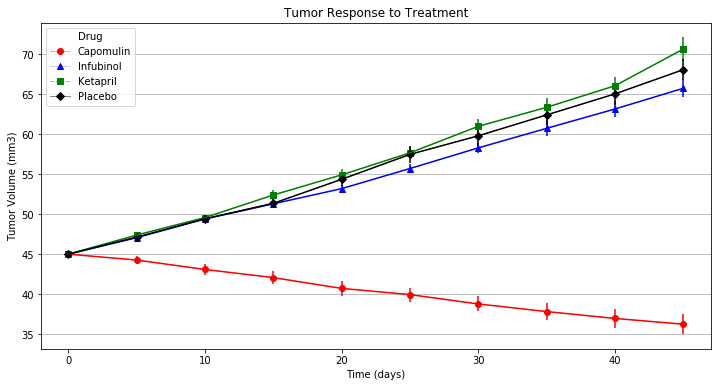

In [5]:
# Select the 4 drugs

tumor_volume_means_4 = tumor_volume_means_df[["Capomulin", "Infubinol", "Ketapril","Placebo"]]

tumor_volume_ses_4 = tumor_volume_ses_df[["Capomulin", "Infubinol", "Ketapril","Placebo"]]


# Generate the plot (with Error Bars)
ax = tumor_volume_means_4.plot(figsize=(12,6), yerr = tumor_volume_ses_4, 
                               color =["r","b","g","k"], legend = False)



# plot the markers
tumor_volume_means_4.plot( style=['o--r', '^:b', 's-.g', 'D-k'], 
                         markersize=6, linewidth =0.5, ax = ax)

# set the titles, axis labels, horizontal grids, x,y limits
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlim(-2,47)
ax.set_xticks([0,10,20,30,40])
ax.yaxis.grid()

# Save the Figure
plt.savefig("../images/treatment.png")

#show the figure
plt.show()


## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_means = trial_data_combined.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
metastatic_means_df = pd.DataFrame(metastatic_means)
metastatic_means_df = metastatic_means_df.reset_index()
# Preview DataFrame
metastatic_means_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_ses = trial_data_combined.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
metastatic_ses_df = pd.DataFrame(metastatic_ses)
metastatic_ses_df = metastatic_ses_df.reset_index()


# # Preview DataFrame
metastatic_ses_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_means_df = metastatic_means_df.pivot(index="Timepoint", columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked
metastatic_means_df.head()

metastatic_ses_df = metastatic_ses_df.pivot(index="Timepoint", columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked
metastatic_ses_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


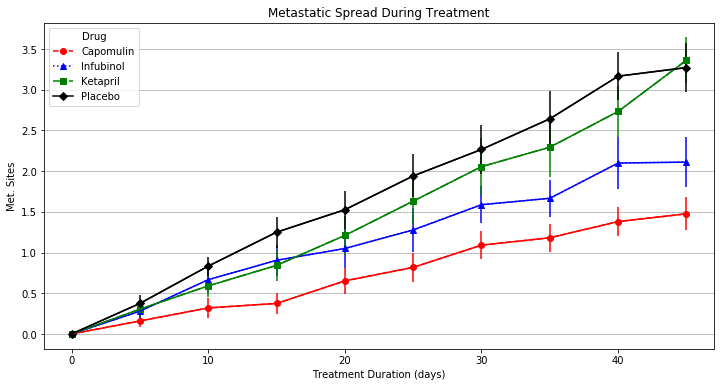

In [9]:
# Select the 4 drugs

metastatic_means_4 = metastatic_means_df[["Capomulin", "Infubinol", "Ketapril","Placebo"]]

metastatic_ses_4 = metastatic_ses_df[["Capomulin", "Infubinol", "Ketapril","Placebo"]]

# Generate the Plot (with Error Bars)
ax = metastatic_means_4.plot(figsize=(12,6), yerr = metastatic_ses_4, 
                               color =["r","b","g","k"], legend = False)



# plot the markers
metastatic_means_4.plot( style=['o--r', '^:b', 's-.g', 'D-k'], 
                         markersize=6, ax = ax)

# set the titles, axis labels, horizontal grids, x,y limits
ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (days)")
ax.set_ylabel("Met. Sites")
ax.set_xlim(-2,47)
ax.set_xticks([0,10,20,30,40])
ax.yaxis.grid()

# Save the Figure
plt.savefig("../images/spread.png")


# Show the Figure
plt.show()


## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_survival_rate = trial_data_combined.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
mice_survival_rate
# Convert to DataFrame
mice_survival_rate_df = pd.DataFrame(mice_survival_rate)
mice_survival_rate_df = mice_survival_rate_df.reset_index()
#  Preview DataFrame
mice_survival_rate_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mice_survival_rate_df=mice_survival_rate_df.pivot(index="Timepoint", columns ="Drug", values="Mouse ID")

# Preview the Data Frame
mice_survival_rate_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


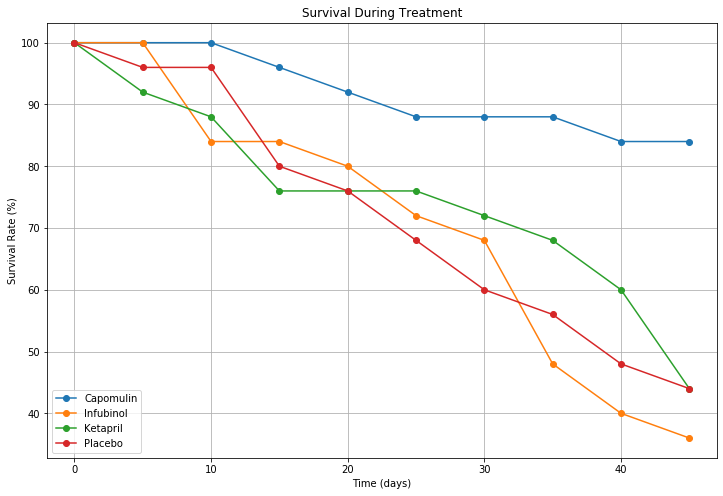

In [12]:
# select the 4 drugs
mice_survival_rate_4 = mice_survival_rate_df[["Capomulin", "Infubinol", "Ketapril","Placebo"]]
mice_survival_rate_4

# Generate the plot (accounting the precentages)
times = list(mice_survival_rate_4.index.values)
total_mice=mice_survival_rate_df.iloc[0,0]
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(times,mice_survival_rate_4/total_mice*100, marker="o")
plt.legend(["Capomulin", "Infubinol", "Ketapril","Placebo"], loc='lower left')


# set the titles, axis labels, horizontal grids, x,y limits
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.xlim(-2,47)
plt.xticks([0,10,20,30,40])
plt.grid()

# Save the Figure
plt.savefig("../images/survival.png")
#Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
pct_change= 100*(tumor_volume_means_df.iloc[tumor_volume_means_df.shape[1]-1]- \
            tumor_volume_means_df.iloc[0])/tumor_volume_means_df.iloc[0]
# Display the data to confirm
pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

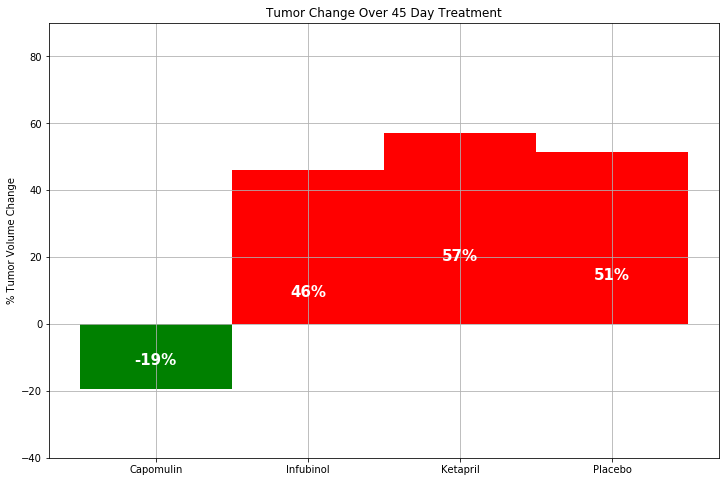

In [14]:
# Store all Relevant Percent Changes into a Tuple

change_heights =[]
change_heights.append(pct_change.get(key="Capomulin"))
change_heights.append(pct_change.get(key="Infubinol"))
change_heights.append(pct_change.get(key="Ketapril"))
change_heights.append(pct_change.get(key="Placebo"))

# # Splice the data between passing and failing drugs

colors =[]
for value in change_heights:
    if value < 0:
        colors.append("g")
    elif value >=0:
        colors.append("r")

# Set the plot title, labels, and limites    
fig, ax=plt.subplots(figsize=(12,8))
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_ylim(-40,90)
drugs=["Capomulin", "Infubinol", "Ketapril","Placebo"]
ax.grid()


# Plot the bar

bars=plt.bar(drugs,change_heights, width=1, color=colors, align="center")

# get y-axis height to calculate lable position from.

(y_bottom, y_top)= ax.get_ylim()
y_height = y_top - y_bottom

# print values

for bar in bars:    
    height = bar.get_height()
    p_height = (height /y_height)
    
    if p_height > 0.10:
        label_position = height - (y_height * 0.30)
    else:
        label_position = height + (y_height * 0.05)
     
    # plot the labels
    plt.text(bar.get_x()+ bar.get_width()/2. , label_position, '{:.0f}%'.format(height),
            ha = 'center', va='bottom', color = "white", fontsize = 15, fontweight="bold")
    
# Save the Figure
plt.savefig("../images/change.png")

# Show the Figure
fig.show()